In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
from sklearn import datasets

: 

In this project, the Wisconsin breast cancer dataset is visualized in two dimensions using Principal Component Analysis (PCA). The process involves the following steps:

1. **Rescaling the Data:**
   - Utilize `sklearn.preprocessing.StandardScaler` to rescale the data, ensuring that every feature has a mean of 0 and a standard deviation of 1 across the various points in the dataset.

2. **Compute Top Two Principal Components:**
   - Use two different approaches:
      - **Direct SVD (Singular Value Decomposition):**
         - Compute the top two principal components directly using SVD without using any PCA built-ins.
      - **PCA from sklearn.decomposition:**
         - Use `sklearn.decomposition.PCA` to compute the top two principal components.

3. **Coordinate Calculation:**
   - For every data point, compute its coordinates (projections) along the two principal components.

4. **Scatterplot Visualization:**
   - Create a scatterplot of the dataset in 2 dimensions.
   - X-axis represents the first principal component, and the Y-axis represents the second.
   - Color the points based on their diagnosis (malignant or benign).

The two approaches (direct SVD and PCA from sklearn.decomposition) should yield exactly the same results, with potential sign differences that can be resolved by flipping signs to ensure identical representations. The scatterplots generated for both approaches should be identical. The analysis aims to explore whether the data is roughly separable in two dimensions, providing insights into the inherent structure of the dataset.

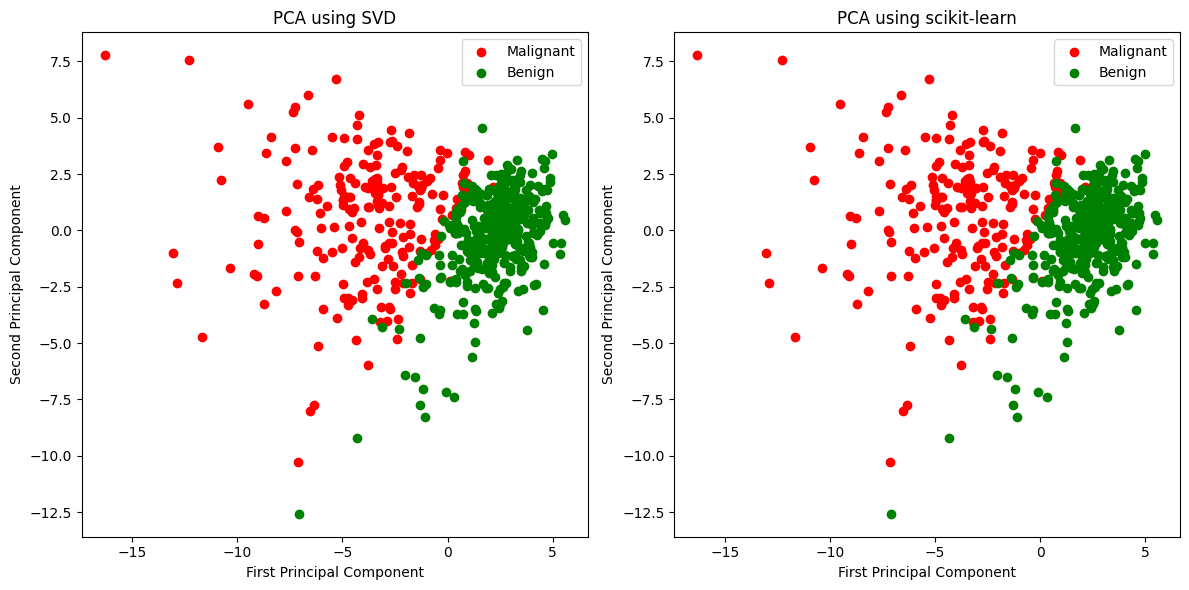

In [76]:

# Load the dataset and extract the features and labels
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Step 1: Rescale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### Using SVD to perform PCA on the breast cancer dataset ####

# Step 2(a): Perform PCA using SVD directly
U, S, VT = np.linalg.svd(X_scaled, full_matrices=False)

#### Using scikit-learn to perform PCA on the breast cancer dataset ####

# Step 2(b): Perform PCA using scikit-learn
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
PC_pca = pca.fit_transform(X_scaled)


# Step 3: Compute projections onto the top two principal components 
PC_svd = X_scaled @ VT.T[:, :2]



#### Comparing the results of the two approaches ####   

# Check if the signs of the singular vectors are flipped; if yes, flip signs
if (PC_svd[:, 0] * PC_pca[:, 0]).mean() < 0:
    PC_pca[:, 0] = -PC_pca[:, 0]
if (PC_svd[:, 1] * PC_pca[:, 1]).mean() < 0:
    PC_pca[:, 1] = -PC_pca[:, 1]

# Step 4: Create scatter plots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for SVD approach
ax[0].scatter(PC_svd[y == 0, 0], PC_svd[y == 0, 1], color='red', label='Malignant')
ax[0].scatter(PC_svd[y == 1, 0], PC_svd[y == 1, 1], color='green', label='Benign')
ax[0].set_xlabel('First Principal Component')
ax[0].set_ylabel('Second Principal Component')
ax[0].set_title('PCA using SVD')
ax[0].legend()

# Scatter plot for scikit-learn PCA approach
ax[1].scatter(PC_pca[y == 0, 0], PC_pca[y == 0, 1], color='red', label='Malignant')
ax[1].scatter(PC_pca[y == 1, 0], PC_pca[y == 1, 1], color='green', label='Benign')
ax[1].set_xlabel('First Principal Component')
ax[1].set_ylabel('Second Principal Component')
ax[1].set_title('PCA using scikit-learn')
ax[1].legend()

plt.tight_layout()
plt.show()



Question: Does the data look roughly separable already in two dimensions?

Answer: Yes. However, there is an overlap in the two classes. 